# Recomendation System about Movies.
We are going to do an algorithm to recommend movies.

* First: we are going to import librarias to use.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn


* Second: we are going to read a rating movies csv to use it in that recomendation system

In [2]:
dataframes = pd.read_csv("ml-latest-small/ratings.csv")
dataframes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


We are going to watch of shape of dataframes, how many movies and explore it this data

In [3]:
dataframes.shape

(100836, 4)

In [4]:
n_movies = len(dataframes.movieId.unique())
print("the dataframes has "+str(n_movies) +" movies")

the dataframes has 9724 movies


In [5]:
n_users = len(dataframes.userId.unique())
print("the dataframes has "+ str(n_users)+" users")

the dataframes has 610 users


We are going to show how frequantly appers a users. 

In [6]:
dataframes.groupby(["userId"])["movieId"].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

We are going to show how frequantly appers a movie. 

In [7]:
dataframes.groupby(["movieId"])["movieId"].count()

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: movieId, Length: 9724, dtype: int64

Now, show you a histogram about movies rating

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

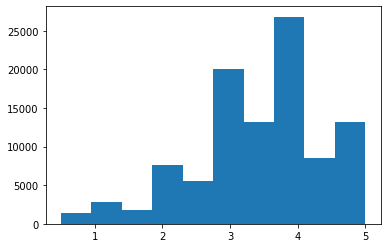

In [8]:
plt.hist(dataframes.rating)

In [9]:
ratings = np.zeros((n_users,n_movies))
ratings.shape

(610, 9724)

We are going to correct the column "movieId", we create a new column called "new_movies_id" to correspond a number in "movieId" in 0 to 9723 scale

In [10]:
serie = dataframes["movieId"].unique()
type(serie)

numpy.ndarray

In [11]:
#np.where(serie == 3)[0][0]
def find(x):
    return np.where(serie == x)[0][0]
find(3)

1

In [12]:

dataframes["new_movies_id"] = dataframes["movieId"].apply(find)

In [13]:
dataframes

,userId,movieId,rating,timestamp,new_movies_id
0,1,1,4.0,964982703,0
1,1,3,4.0,964981247,1
2,1,6,4.0,964982224,2
3,1,47,5.0,964983815,3
4,1,50,5.0,964982931,4
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,3120
100832,610,168248,5.0,1493850091,2035
100833,610,168250,5.0,1494273047,3121
100834,610,168252,5.0,1493846352,1392


Now we define ratings matrix where every row is a users and every columns is a movie.

In [14]:
for row in dataframes.itertuples():
 #   print(row)
  #  print(row[1]-1,row[5])
    ratings[row[1]-1,row[5]] = row[3]

In [15]:
ratings

array([[4. , 4. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 0. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 5. , ..., 3. , 3.5, 3.5]])

In [16]:
ratings.shape

(610, 9724)

Now the sparsity is the percentage nonzeros values in the matrix

In [17]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *= 100
print("spartsity coeficient: {:4.2f}%".format(sparsity))

spartsity coeficient: 1.70%


## Train and Test sets:

We are going to split ratings data in train (70% data) and test (30% data)

In [18]:
from sklearn.model_selection import train_test_split
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.3, random_state=42)

In [19]:
ratings_train.shape

(427, 9724)

In [20]:
ratings_test.shape

(183, 9724)

## Train model

We are going to take cosine distance among points in ratings_train y with this distance, we define sim_matrix (similarity matrix).
sim_matrix will be 1 if two points are distance equal 0 (close) and will be 0 if two points are distance equal 1 (far)

In [21]:
cosin_dist = sklearn.metrics.pairwise.cosine_distances(ratings_train)
sim_matrix = 1-cosin_dist

In [22]:
sim_matrix

array([[1.        , 0.0980535 , 0.03140436, ..., 0.02379112, 0.07365584,
        0.1642774 ],
       [0.0980535 , 1.        , 0.02867931, ..., 0.02766828, 0.02306212,
        0.17376336],
       [0.03140436, 0.02867931, 1.        , ..., 0.        , 0.        ,
        0.04680326],
       ...,
       [0.02379112, 0.02766828, 0.        , ..., 1.        , 0.        ,
        0.06299359],
       [0.07365584, 0.02306212, 0.        , ..., 0.        , 1.        ,
        0.12103253],
       [0.1642774 , 0.17376336, 0.04680326, ..., 0.06299359, 0.12103253,
        1.        ]])

In [23]:
sim_matrix.shape

(427, 427)

Then, our prediction will be:

In [24]:
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T


We define now a function to get mean squared error.

In [25]:
from sklearn.metrics import mean_squared_error
def get_mse(preds, actuals):
    if preds.shape[0] != actuals.shape[0]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [26]:
print("the mean squared error is: {:4.2f}%".format(get_mse(users_predictions, ratings_train)))

the mean squared error is: 9.53%


We can to apply this rule to test set. 

In [27]:

sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_test)
users_predictions = sim_matrix.dot(ratings_test) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
print("the mean squared error is: {:4.2f}%".format(get_mse(users_predictions, ratings_test)))

the mean squared error is: 8.53%


In [28]:
users_predictions

array([[1.89453052, 0.3542941 , 1.12564558, ..., 0.        , 0.        ,
        0.        ],
       [1.9468067 , 0.3377341 , 1.11128173, ..., 0.        , 0.        ,
        0.        ],
       [1.52557609, 0.43695877, 1.04436616, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.73781957, 0.31718095, 1.10019595, ..., 0.        , 0.        ,
        0.        ],
       [1.62001394, 0.49919151, 1.13284391, ..., 0.        , 0.        ,
        0.        ],
       [1.78835329, 0.42591352, 0.98736319, ..., 0.        , 0.        ,
        0.        ]])

In [29]:
ratings_test

array([[2.5, 0. , 3.5, ..., 0. , 0. , 0. ],
       [3.5, 0. , 3.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 3. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

# KNN

We are going to improve our model. In the previous model, all data has influence in a prediction to an user. Unlike before, we are going to considere only k similar users to influence a predictions to an user

In [30]:
from sklearn.neighbors import NearestNeighbors

We define our Nearest Neighbors algorithm to find rating about k users.

In [31]:
k = 8
neighbors = NearestNeighbors(k, 'cosine')

We apply our algorithm to rating_train

In [32]:
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius='cosine')

We define top_k_distance and top_k_user with the distance Nearest and its users respectly

In [33]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)

In [34]:
top_k_distances.shape

(427, 8)

In [35]:
top_k_distances[4]

array([ 0.        , 38.07229964, 39.50632861, 39.75864686, 39.92179856,
       39.95935435, 39.98437195, 40.17461885])

In [36]:
top_k_users.shape

(427, 8)

In [37]:
top_k_users[2]

array([  2, 323, 313, 319, 177, 302, 131, 132])

We make predictions to train

In [38]:
users_predicts_k_train = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# para cada usuario del conjunto de entrenamiento
    users_predicts_k_train[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

and evaluate our model with ratings_train

In [39]:

print("the mean squared error is: {:4.2f}%".format(get_mse(users_predicts_k_train, ratings_train)))

the mean squared error is: 10.58%


We will do in test similarly

In [40]:
neighbors.fit(ratings_test)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                 radius='cosine')

In [41]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_test, return_distance=True)

In [42]:
top_k_distances.shape

(183, 8)

In [43]:
top_k_distances[0]


array([ 0.        , 50.00249994, 51.66478491, 51.87725899, 52.04084934,
       52.07926651, 52.25179423, 52.29961759])

In [44]:
top_k_users.shape

(183, 8)

In [45]:
top_k_users[0]

array([  0,  54, 156,  27,  63,  50,  32, 126])

In [46]:
users_predicts_k_test = np.zeros(ratings_test.shape)
for i in range(ratings_test.shape[0]):# para cada usuario del conjunto de test
    users_predicts_k_test[i,:] = top_k_distances[i].T.dot(ratings_test[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T


In [47]:
get_mse(users_predicts_k_test, ratings_test)
print("the mean squared error is: {:4.2f}%".format(get_mse(users_predicts_k_test, ratings_test)))

the mean squared error is: 10.61%
